# CS 5330 Final Project: Text-to-Image generation
### Anisha Kumari Kushwaha, Kirti Kshirsagar, Sarthak Kagliwal
### 24 April 2024
### Text to Image generation using Dall-E Mini and evaluation using similarity score

In [2]:
!pip install -q torch torchvision
!pip install -q ftfy regex tqdm
!pip install -q git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 825.0 kB/s eta 0:00:000:00:01
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-7ybw_ghq
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-7ybw_ghq
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py) ... done
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=a1a6568ee6cf9e9d4a6cc49dd33779f9cad29c8c81914e49413e42afe5c2f666
  Stored in directory: /tmp/pip-ephem-wheel-cache-u8uzhh8e/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [5]:
pip install -q min-dalle

Note: you may need to restart the kernel to use updated packages.


In [6]:
from min_dalle import MinDalle

In [10]:
model = MinDalle(is_mega=True, is_reusable=True)

using device cuda
intializing TextTokenizer
initializing DalleBartEncoder
initializing DalleBartDecoder
initializing VQGanDetokenizer


In [12]:
gridSize = 1
temperature = 4
superconditionFactor = 16
topK = 128

def generateImageByPrompt(promt: str, gridSize=gridSize):
    image = model.generate_image(
    text=promt,
    seed=-1,
    temperature=temperature,
    top_k=int(topK),
    supercondition_factor=superconditionFactor,
    grid_size=gridSize            
    )
    
    display(image)
    return image

In [21]:
import clip
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np

# Load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model_evl, preprocess = clip.load('ViT-B/32', device=device)
similarity_score = []

def calculate_clip_score(text_prompt):
    # Load and preprocess the image
    image = preprocess(generateImageByPrompt(text_prompt)).unsqueeze(0).to(device)

    # Encode image and text
    with torch.no_grad():
        image_features = model_evl.encode_image(image)
        text_features = model_evl.encode_text(clip.tokenize([text_prompt]).to(device))
    
    # Calculate cosine similarity
    cosine_similarity = torch.nn.functional.cosine_similarity(image_features, text_features).cpu().numpy()[0]
    print(f'CLIP similarity score: {cosine_similarity}')
    return cosine_similarity





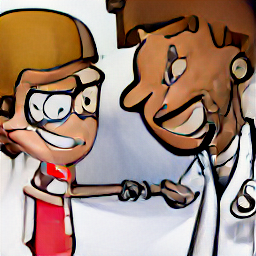

CLIP similarity score: 0.28466796875


In [22]:
prompt = "A black doctor treating a white patient"
score = calculate_clip_score(prompt)
similarity_score.append(score)

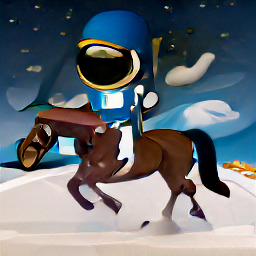

CLIP similarity score: 0.3134765625


In [23]:
prompt = "A horse riding an astronaut"
score = calculate_clip_score(prompt)
similarity_score.append(score)

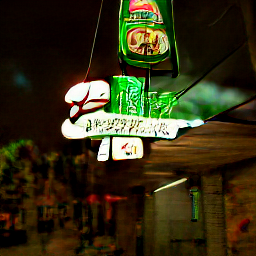

CLIP similarity score: 0.23583984375


In [24]:
prompt = "A neon sign reading 'Open 24 Hours' hangs above a diner at night"
score = calculate_clip_score(prompt)
similarity_score.append(score)

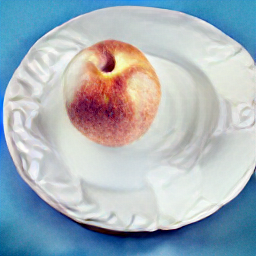

CLIP similarity score: 0.353271484375


In [25]:
prompt = "A red apple on a white plate against a blue background"
score = calculate_clip_score(prompt)
similarity_score.append(score)

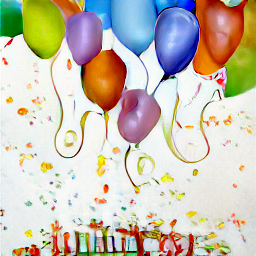

CLIP similarity score: 0.35009765625


In [26]:
prompt = "A 'Happy Birthday' greeting card with colorful balloons and confetti"
score = calculate_clip_score(prompt)
similarity_score.append(score)

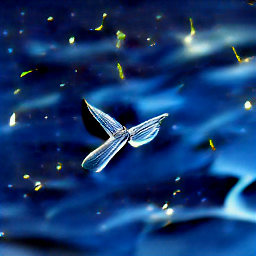

CLIP similarity score: 0.318115234375


In [27]:
prompt = "A flying fish with the wings of a butterfly, swimming through a sky filled with stars"
score = calculate_clip_score(prompt)
similarity_score.append(score)

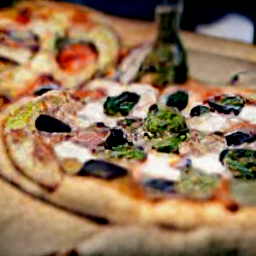

CLIP similarity score: 0.293212890625


In [28]:
prompt = "Create a menu for italian restaurant with various pizzas and prices"
score = calculate_clip_score(prompt)
similarity_score.append(score)

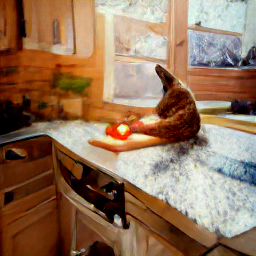

CLIP similarity score: 0.32080078125


In [29]:
prompt = "A kitchen scene with a chef chopping vegetables on a wooden cutting board, a pot boiling on the stove, and a cat lounging by the sunny window"
score = calculate_clip_score(prompt)
similarity_score.append(score)

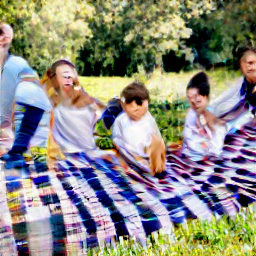

In [14]:
prompt = "A family of four having a picnic in a park, with the parents sitting on a checkered blanket while the children play with a Frisbee nearby"
generateImageByPrompt(prompt)

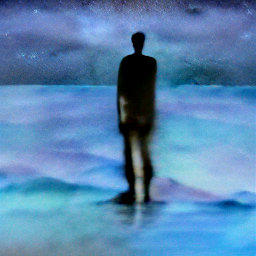

CLIP similarity score: 0.328857421875


In [30]:
prompt = "An abstract representation of loneliness, with a figure standing on a solitary island surrounded by an endless expanse of empty ocean under a starless sky"
score = calculate_clip_score(prompt)
similarity_score.append(score)

In [32]:
print("Average Similarity Score: ", np.average(similarity_score))

Average Similarity Score:  0.311
